In [ ]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
missing_values = ['?', '--', ' ', 'NA', 'N/A', '-']
url='https://raw.githubusercontent.com/sarthakjain36/cardio_data/main/cardio_train.csv'
df=pd.read_csv(url, delimiter=';', na_values=missing_values)
print('There are Total {} datapoints in the dataset with {} Features listed as {}:'.format(df.shape[0], df.shape[1], df.columns.values))

There are Total 70000 datapoints in the dataset with 13 Features listed as ['id' 'age' 'gender' 'height' 'weight' 'sbp' 'dbp' 'cholesterol' 'gluc'
 'smoke' 'alco' 'active' 'cardio']:


In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   sbp          70000 non-null  int64  
 6   dbp          70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os#Walking through directores

import plotly.graph_objects as go # Generate Graphs
from plotly.subplots import make_subplots #To Create Subplots

from sklearn import decomposition #pca
from sklearn.preprocessing import StandardScaler # Standardization ((X - X_mean)/X_std)

from sklearn.neighbors import KNeighborsClassifier #KNN Model
from sklearn.ensemble import RandomForestClassifier #RandomForest Model
from sklearn.linear_model import LogisticRegression #Logistic Model

from sklearn.model_selection import train_test_split # Splitting into train and test

from sklearn.model_selection import GridSearchCV# Hyperparameter Tuning
from sklearn.model_selection import cross_val_score#cross validation score

from sklearn.metrics import classification_report # text report showing the main classification metrics
from sklearn.metrics import confusion_matrix #to get confusion_matirx 
pd.set_option('display.max_columns', None)

# New Section

In [ ]:
features_with_null = [features for feature in df.columns if df[feature].isnull().sum()>0]
if features_with_null:
    print('Features with Null Values {}'.format(features_with_null))
else:
    print('Dataset contains no Null Values')

df.drop(columns=['id'], inplace=True)

duplicate_sum = df.duplicated().sum()
if duplicate_sum:
    print('Duplicates Rows in Dataset are : {}'.format(duplicate_sum))
else:
    print('Dataset contains no Duplicate Values')

duplicated = df[df.duplicated(keep=False)]
duplicated = duplicated.sort_values(by=['gender', 'height', 'weight'], ascending= False)
duplicated.head()

df.drop_duplicates(keep = 'first', inplace = True)
print('Total {} datapoints remaining with {} features'.format(df.shape[0], df.shape[1]))

Dataset contains no Null Values
Duplicates Rows in Dataset are : 24
Total 69976 datapoints remaining with 12 features


In [ ]:
Continuous_features = [feature for feature in df.columns if (df[feature].unique().sum()>25)]
print('Continuous Values are : {}'.format(Continuous_features))

df[Continuous_features].describe()

incorrect_sbp=sum(df['sbp']<80)+ sum(df['sbp']>240)
incorrect_dbp=sum(df['dbp']>160)
print("The no of values that lie outside the considerable systolic range of 80-240 mm Hg presuure are: {}" .format(incorrect_sbp))
print("The no of values that lie outside the considerable diastolic range of <160 mm Hg presuure are: {}" .format(incorrect_dbp))

fig = go.Figure()

fig.add_trace(go.Box(x=df['height'], name = 'Height', boxpoints='outliers',))
fig.add_trace(go.Box(x=df['weight'], name = 'Weight', boxpoints='outliers',))
fig.add_trace(go.Box(x=df['sbp'], name = 'Systolic Pressure', boxpoints='outliers',))
fig.add_trace(go.Box(x=df['dbp'], name = 'Diastolic Pressure', boxpoints='outliers',))

fig.update_layout(title_text="Box Plot for Weight and Height with Outliers")
fig.show()

Continuous Values are : ['age', 'height', 'weight', 'sbp', 'dbp']
The no of values that lie outside the considerable systolic range of 80-240 mm Hg presuure are: 247
The no of values that lie outside the considerable diastolic range of <160 mm Hg presuure are: 966


In [ ]:
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
outliers(df[['height', 'weight','sbp','dbp']])
#print(sum(df['ap_hi']<0)+sum(df['ap_hi']>=180))

outline_free_df = df.copy()
outline_free_df[['height', 'weight']] = np.log(outline_free_df[['height', 'weight']])
outliers(outline_free_df[['height', 'weight']])

outline_free_df = outline_free_df[(outline_free_df['weight'] > outline_free_df['weight'].quantile(0.005)) & (outline_free_df['weight'] < outline_free_df['weight'].quantile(0.995))]
outline_free_df = outline_free_df[(outline_free_df['height'] > outline_free_df['height'].quantile(0.005)) & (outline_free_df['height'] < outline_free_df['height'].quantile(0.995))]
outliers(outline_free_df[['height', 'weight']])
print('Handling outliners cost us {} datapoints'.format(len(df)-len(outline_free_df)))

outline_free_df = outline_free_df[outline_free_df['dbp']>=0]
outline_free_df = outline_free_df[outline_free_df['sbp']>=0]

print('There are total {} observations where ap_hi < ap_lo'.format(len(outline_free_df[outline_free_df['sbp'] < outline_free_df['dbp']])))

cleaned_data = outline_free_df[outline_free_df['sbp'] >= outline_free_df['dbp']].reset_index(drop=True)
print('Total observations preserved : {}'.format(len(cleaned_data)))
print('As per our assumptions we have total {} outliers'.format(len(cleaned_data[(cleaned_data["sbp"]>240) | (cleaned_data["dbp"]>160)])))

cleaned_data = cleaned_data[((cleaned_data["sbp"]<=240)&(cleaned_data["sbp"]>=80)) & (cleaned_data["dbp"]<=160)]
print('Total {} datapoints remaining with {} features'.format(cleaned_data.shape[0], cleaned_data.shape[1]))

For the feature height, No of Outliers is 519
For the feature weight, No of Outliers is 1819
For the feature sbp, No of Outliers is 1435
For the feature dbp, No of Outliers is 4632
For the feature height, No of Outliers is 484
For the feature weight, No of Outliers is 1174
For the feature height, No of Outliers is 0
For the feature weight, No of Outliers is 349
Handling outliners cost us 1630 datapoints
There are total 1182 observations where ap_hi < ap_lo
Total observations preserved : 67156
As per our assumptions we have total 41 outliers
Total 67105 datapoints remaining with 12 features


In [ ]:
cleaned_data['age'] = cleaned_data['age'].div(365).apply(lambda x: int(x))
fig = go.Figure()
fig.add_trace(go.Histogram(x=cleaned_data['age'], name= 'Age'))
fig.show()

In [ ]:
cleaned_data[Continuous_features].describe()

age        height        weight           sbp           dbp
count  67105.000000  67105.000000  67105.000000  67105.000000  67105.000000
mean      52.833500      5.101741      4.287758    126.654348     81.255644
std        6.762307      0.045269      0.175356     16.588378      9.542144
min       29.000000      4.983607      3.824284     80.000000      0.000000
25%       48.000000      5.068904      4.174387    120.000000     80.000000
50%       53.000000      5.105945      4.276666    120.000000     80.000000
75%       58.000000      5.135798      4.406719    140.000000     90.000000
max       64.000000      5.220356      4.820282    240.000000    160.000000

In [ ]:
duplicate_sum = cleaned_data.duplicated().sum()
if duplicate_sum:
    print('Duplicates Rows in Dataset are : {}'.format(duplicate_sum))
else:
    print('Dataset contains no Duplicate Values')

duplicated = cleaned_data[cleaned_data.duplicated(keep=False)]
duplicated = duplicated.sort_values(by=['gender', 'height', 'weight'], ascending= False)
duplicated.head()

cleaned_data.drop_duplicates(keep = 'first', inplace = True)
print('Total {} datapoints remaining with {} features'.format(cleaned_data.shape[0], df.shape[1]))

Duplicates Rows in Dataset are : 3180
Total 63925 datapoints remaining with 12 features


In [ ]:
fig = go.Figure(data=[go.Bar(x = cleaned_data[cleaned_data['cardio'] == 0]['age'].value_counts().index.to_list(), 
                             y =cleaned_data[cleaned_data['cardio'] == 0]['age'].value_counts().values, name = 'Non CVD'),
                      go.Bar(x = cleaned_data[cleaned_data['cardio'] == 1]['age'].value_counts().index.to_list(), 
                             y =cleaned_data[cleaned_data['cardio'] == 1]['age'].value_counts().values, name = 'CVD')]
               )

fig.update_layout(barmode='group', xaxis_tickangle=-45, title_text="Distribution of Age groups grouped by Target Value", 
                  yaxis=dict(
        title='Total Count',
        titlefont_size=16,
        tickfont_size=14,
    ),     xaxis=dict(
        title='Age',
        titlefont_size=16,
        tickfont_size=14,
    ))
fig.show()

In [ ]:
fig = make_subplots(rows=2, cols=2, subplot_titles=("Height Distribution for CVD Population", "Height Distribution for non CVD Population", "Weight Distribution for CVD Population", "Weight Distribution for non CVD Population"))

trace0 = go.Histogram(x=np.exp(cleaned_data[cleaned_data['cardio'] == 0]['height']), name = 'Non CVD')
trace1 = go.Histogram(x=np.exp(cleaned_data[cleaned_data['cardio'] == 1]['height']), name = 'CVD')

trace2 = go.Histogram(x=np.exp(cleaned_data[cleaned_data['cardio'] == 0]['weight']), name = 'Non CVD')
trace3 = go.Histogram(x=np.exp(cleaned_data[cleaned_data['cardio'] == 1]['weight']), name = 'CVD')

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)

fig.update_xaxes(title_text="Height", row=1, col=1)
fig.update_yaxes(title_text="Total Count", row=1, col=1)

fig.update_xaxes(title_text="Height", row=1, col=2)
fig.update_yaxes(title_text="Total Count", row=1, col=2)

fig.update_xaxes(title_text="Weight", row=2, col=1)
fig.update_yaxes(title_text="Total Count", row=2, col=1)

fig.update_xaxes(title_text="Weight", row=2, col=2)
fig.update_yaxes(title_text="Total Count", row=2, col=2)

fig.show()

In [ ]:
fig = go.Figure(data=[go.Bar(x = cleaned_data[cleaned_data['cardio'] == 0]['sbp'].value_counts().index.to_list(), 
                             y =cleaned_data[cleaned_data['cardio'] == 0]['sbp'].value_counts().values, name = 'Non CVD'),
                      go.Bar(x = cleaned_data[cleaned_data['cardio'] == 1]['sbp'].value_counts().index.to_list(), 
                             y =cleaned_data[cleaned_data['cardio'] == 1]['sbp'].value_counts().values, name = 'CVD')]
               )

fig.update_layout(barmode='group', xaxis_tickangle=-45, title_text="Distribution of Systolic blood pressure Values grouped by Target Value", 
                  yaxis=dict(
        title='Total Count',
        titlefont_size=16,
        tickfont_size=14,
    ),     xaxis=dict(
        title='Systolic Blood Pressure Values',
        titlefont_size=16,
        tickfont_size=14,
    ))
fig.show()

In [ ]:
fig = go.Figure([go.Pie(labels=cleaned_data[cleaned_data['cardio'] == 1]['sbp'].value_counts().index.to_list(),values=cleaned_data[cleaned_data['cardio'] == 1]['sbp'].value_counts().values)])
fig.update_layout(title_text="Distribution of Systolic blood pressure values for CVD", template="plotly_white")
fig.data[0].marker.line.color = 'rgb(255, 255, 255)'
fig.data[0].marker.line.width = 2
fig.update_traces(textposition='inside')
fig.show()

In [ ]:
fig = go.Figure(data=[go.Bar(x = cleaned_data[cleaned_data['cardio'] == 0]['dbp'].value_counts().index.to_list(), 
                             y =cleaned_data[cleaned_data['cardio'] == 0]['dbp'].value_counts().values, name = 'Non CVD'),
                      go.Bar(x = cleaned_data[cleaned_data['cardio'] == 1]['dbp'].value_counts().index.to_list(), 
                             y =cleaned_data[cleaned_data['cardio'] == 1]['dbp'].value_counts().values, name = 'CVD')]
               )

fig.update_layout(barmode='group', xaxis_tickangle=-45, title_text="Distribution of Diastolic blood pressure Values grouped by Target Value", 
        yaxis=dict(
        title='Total Count',
        titlefont_size=16,
        tickfont_size=14,
    ),     xaxis=dict(
        title='Diastolic Blood Pressure Values',
        titlefont_size=16,
        tickfont_size=14,
    ))
fig.show()

In [ ]:
fig = go.Figure([go.Pie(labels=cleaned_data[cleaned_data['cardio'] == 1]['dbp'].value_counts().index.to_list(),values=cleaned_data[cleaned_data['cardio'] == 1]['dbp'].value_counts().values)])
fig.update_layout(title_text="Distribution of Daistolic blood pressure values for CVD", template="plotly_white")
fig.data[0].marker.line.color = 'rgb(255, 255, 255)'
fig.data[0].marker.line.width = 2
fig.update_traces(textposition='inside')
fig.show()

In [ ]:
Categorial_features = [feature for feature in cleaned_data.columns if len(cleaned_data[feature].unique())<25]
print('Categorial Values are : {}'.format(Categorial_features))

Categorial Values are : ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']


In [ ]:
for each_feature in Categorial_features:
    print('No of Categorial Values in Feature {} is {} as {}'.format(each_feature, len(cleaned_data[each_feature].unique()), cleaned_data[each_feature].unique()))

No of Categorial Values in Feature gender is 2 as [2 1]
No of Categorial Values in Feature cholesterol is 3 as [1 3 2]
No of Categorial Values in Feature gluc is 3 as [1 2 3]
No of Categorial Values in Feature smoke is 2 as [0 1]
No of Categorial Values in Feature alco is 2 as [0 1]
No of Categorial Values in Feature active is 2 as [1 0]
No of Categorial Values in Feature cardio is 2 as [0 1]


In [ ]:
fig = go.Figure([go.Pie(labels=['Not Having CVD', 'Having CVD'],values=cleaned_data['cardio'].value_counts().values)])
fig.update_layout(title_text="Pie chart of Target Variable", template="plotly_white")
fig.data[0].marker.line.color = 'rgb(255, 255, 255)'
fig.data[0].marker.line.width = 2
fig.update_traces(hole=.4,)
fig.show()

In [ ]:
fig = make_subplots(rows=2, cols=3,subplot_titles=("Alcohol Distribution", "Gender Distribution", "Choslesterol Distribution", "Glucose Distribution", "Smoking Distribution", "Fitness Distribution"), specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=['Non Alchoalic', 'Alchoalic'],values=cleaned_data['alco'].value_counts().values, name = 'Alchoal Status'), 1, 1)
fig.add_trace(go.Pie(labels=['Female', 'Male'],values=cleaned_data['gender'].value_counts().values, name = 'Gender Status'), 1, 2)

fig.add_trace(go.Pie(labels=['Normal', 'Above Normal', 'Well Above Normal'],values=cleaned_data['cholesterol'].value_counts().values, name = 'Cholesterol Level Status'), 1, 3)
fig.add_trace(go.Pie(labels=['Normal', 'Above Normal', 'Well Above Normal'],values=cleaned_data['gluc'].value_counts().values, name = 'Glucose Level Status'), 2, 1)

fig.add_trace(go.Pie(labels=['Non Smoker', 'Smoker'],values=cleaned_data['smoke'].value_counts().values, name = 'Smoking Status'), 2, 2)
fig.add_trace(go.Pie(labels=['Not Involved in Physical Activites', 'Involved in Physical Activites'],values=cleaned_data['active'].value_counts().values, name = 'Fitness Status'), 2, 3)

fig.update_traces(hole=.4,)
fig.update_layout(title_text="Distribution of Various Categorial Values")

fig.show()

**Dimensionality Redustion Techniques**

In [ ]:
y = np.array(cleaned_data['cardio'])     
X = np.array(cleaned_data.drop(['cardio'], axis=1))
X.shape
y.shape


(63925,)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#target_value = cleaned_data['cardio']     #PCA for dimentionality Reduction
#cleaned_data_for_pca = cleaned_data.drop(['cardio'], axis=1)

In [ ]:
#scaled_data = StandardScaler().fit_transform(cleaned_data_for_pca)

pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
pca_data = np.vstack((pca_data.T, y_train)).T
pca_df = pd.DataFrame(data = pca_data, columns = ('first', 'second', 'label'))

In [ ]:
fig = go.Figure(data=go.Scattergl(
    x = pca_df['first'], 
    y = pca_df['second'],
    mode='markers',
    marker_color=pca_df['label']
))

fig.show()

That's our whole dataset in 2D. Though visually it seems they kind of forms some clusters, they still have lots disturbance.

**LDA Method**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth = 2, random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Accuracy -> ' + str(accuracy_score(y_test, y_pred)))

[[4747 1453]
 [2030 4555]]
Accuracy -> 0.7275713727023856


# **Feature Engineering**





In [ ]:
#Feature Engineering
def BMI(data):
    return np.exp(data['weight']) / (np.exp(data['height'])/100)**2 
 
cleaned_data['bmi'] = cleaned_data.apply(BMI, axis=1)

In [ ]:
def pulse(data):
    return np.subtract(data['sbp'], data['dbp'])
 
cleaned_data['pulse_pressure'] = cleaned_data.apply(pulse, axis=1)

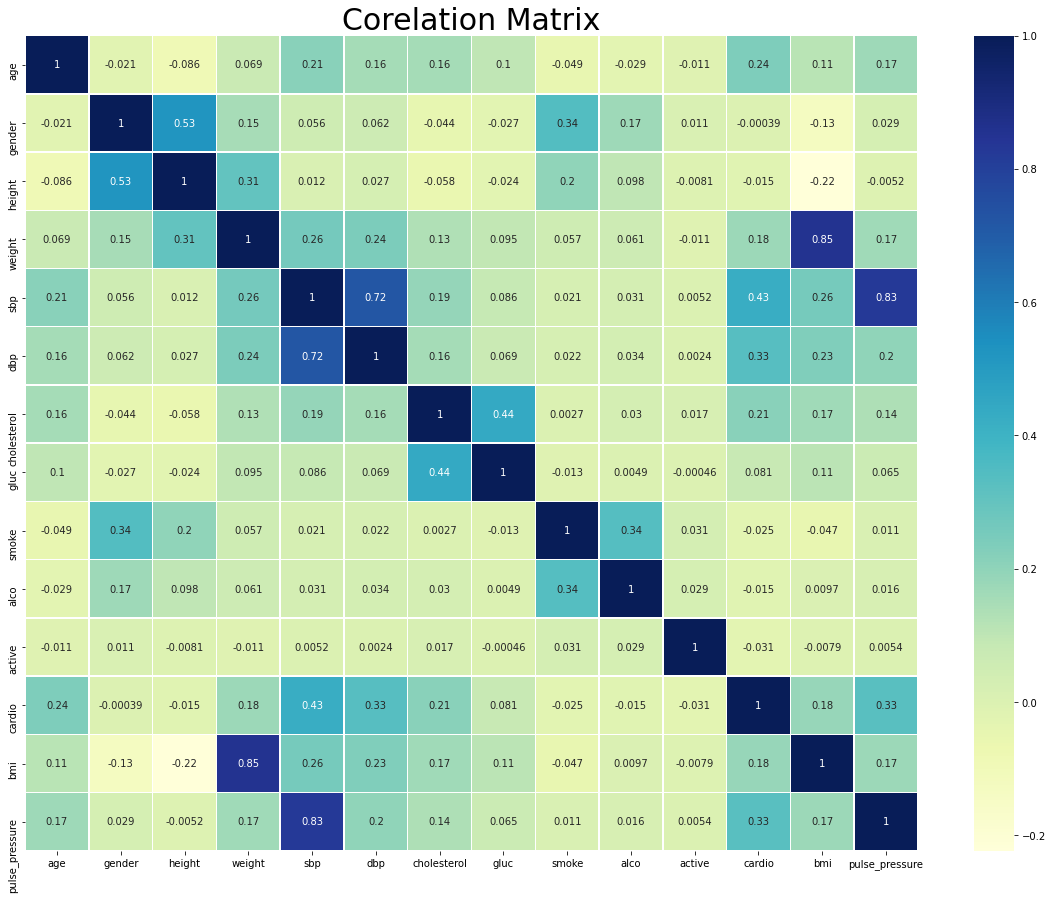

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 15) 
sns.heatmap(cleaned_data.corr(), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Matrix', fontsize = 30)
plt.show()

In [ ]:
cor=cleaned_data.corr()
print(cor.shape[0])
columns = np.full((cor.shape[0],), True, dtype=bool)
print(columns)

14
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True]


In [ ]:
selected_columns = cleaned_data.columns[columns]


In [ ]:
import statsmodels.api as sm

def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns = backwardElimination(cleaned_data.iloc[:,2:].values, cleaned_data.iloc[:,0].values, SL, selected_columns)

This is what we are doing in the above code block:

-We assume to null hypothesis to be “The selected combination of dependent variables do not have any effect on the independent variable”.

-Then we build a small regression model and calculate the p values.

-If the p values is higher than the threshold, we discard that combination of features.

In [ ]:
print(data_modeled.size,len(data_modeled),len(data_modeled[0]),len(selected_columns))

703175 63925 11 13


In [ ]:
data = cleaned_data[['sbp',	'dbp',	'cholesterol','pulse_pressure']]
data.head()


sbp  dbp  cholesterol  pulse_pressure
0  110   80            1            30.0
1  140   90            3            50.0
2  130   70            3            60.0
3  150  100            1            50.0
4  100   60            1            40.0

In [ ]:

useful_columns = ['sbp',	'dbp',	'cholesterol','pulse_pressure']
data.loc[:,useful_columns].to_csv('new.csv',sep=';')


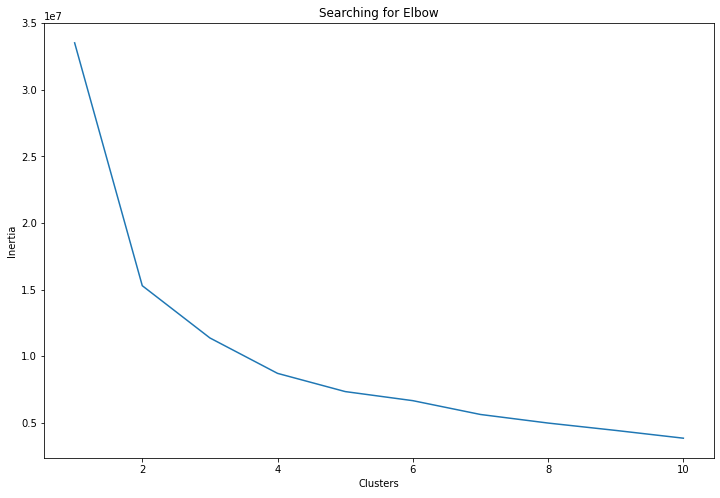

In [ ]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(data)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

In [ ]:
kmeans = KMeans(n_clusters=7)

y = kmeans.fit_predict(data)

data['Cluster'] = y

print(data.head())

   sbp  dbp  cholesterol  pulse_pressure  Cluster
0  110   80            1            30.0        0
1  140   90            3            50.0        6
2  130   70            3            60.0        1
3  150  100            1            50.0        3
4  100   60            1            40.0        4


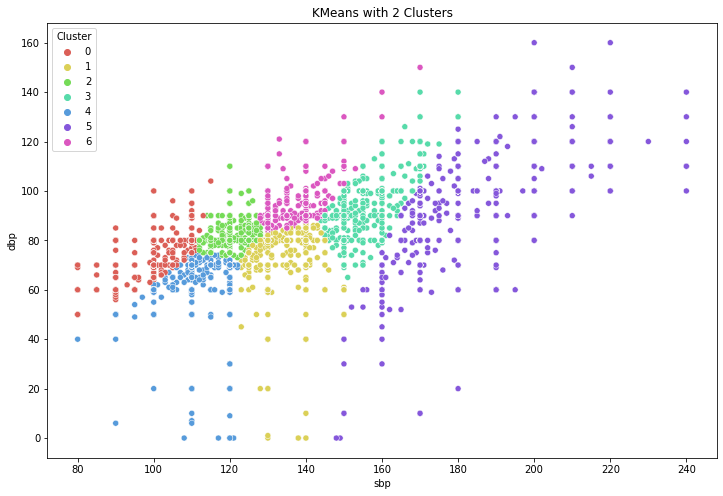

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data['sbp'], data['dbp'], hue=data['Cluster'], 
                palette=sns.color_palette('hls', 7))
plt.title('KMeans with 2 Clusters')
plt.show()

DBSCAN Method